# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Import et publication recueil csv

---

# Mise en forme données
---

In [3]:
cd ../..

/Volumes/Geek/Work/Patat


In [110]:
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

## GoogleSheet Recueil

In [5]:
import patat.util.gsheet

In [6]:
gs = patat.util.gsheet.GoogleSheet()

In [7]:
sheet_id = '1RFxwIBYqa_eYcx_LZpTdhi47QbLcesz9NByMfGzdJ8s'
range_name = 'articles labellisés'

In [8]:
df_brut = gs.read_df(sheet_id,range_name)

In [9]:
df_brut

,#site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signé,...,inversion de la preuve,invérifiable,titre décalé,dénigrement,cherry picking,degré infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné)
0,1,1,Alnas,https://www.alnas.fr/actualite/communaute/lara...,,31/10/2022,L’Arabie saoudite organise des célébrations d'...,,non,non,...,non,non,non,non,non,,FB,None,None,None
1,1,2,Alnas,https://www.alnas.fr/actualite/en-vrac/quel-ar...,,19/10/2022,« Quel art ! » : un étudiant en droit invente ...,,non,non,...,non,non,non,non,non,,FB,None,None,None
2,1,3,Alnas,https://www.alnas.fr/actualite/politique/laust...,,18/10/2022,L’Australie ne reconnaît plus Jérusalem comme ...,,non,non,...,non,non,non,non,non,,FB,None,None,None
3,1,4,Alnas,https://www.alnas.fr/actualite/communaute/nant...,,17/10/2022,Nantes : une mère musulmane meurt poignardée e...,,non,non,...,non,non,non,non,non,,FB,None,None,None
4,1,5,Alnas,https://www.alnas.fr/actualite/en-vrac/la-fran...,,10/11/2022,La France condamnée pour avoir placé un enfant...,le titre est décalé (donne une impression faus...,non,non,...,non,non,oui,non,non,,FB,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,44,618,Wikistrike,https://www.wikistrike.com/2022/10/la-pologne-...,,31/10/2022,La Pologne s’apprête à s’emparer du territoire...,relai de ragots invérifiés,oui,non,...,non,oui,oui,non,non,2,FB,None,None,None
619,44,619,Wikistrike,https://www.wikistrike.com/2022/11/exclusivite...,,19/11/2022,Exclusivité WikiStrike: un physicien en colère...,délire total d'un physicien anonyme (ahurissan...,oui,non,...,non,non,non,non,non,1,FB,None,None,None
620,44,620,Wikistrike,https://www.wikistrike.com/2022/12/zelensky-pa...,,23/12/2023,Zelensky parti demander à papa Biden une aide ...,l'article est vide (même si le titre accuse Ze...,oui,non,...,non,non,non,non,non,1,FB,None,None,None
621,44,621,Wikistrike,https://www.wikistrike.com/2023/01/le-chef-du-...,,03/01/2023,Le chef du renseignement iranien assure que la...,long compte rendu d'un interview du chef du re...,non,non,...,non,non,non,non,non,,FB,None,None,None


In [10]:
import urllib
def get_site(url):
    parse = urllib.parse.urlparse(url)
    if parse:
        return parse.netloc

In [11]:
df_brut['site']=df_brut['url'].apply(get_site)

In [12]:
df_brut[df_brut['site']=='']

,#site,# article,Site,url,Auteur/trice,Date,Titre,Explication (pour les infox seulement),infox,signé,...,invérifiable,titre décalé,dénigrement,cherry picking,degré infox,observateur,thème (abandonné),type infox (abandonné),Date de collection (abandonné),site


In [13]:
df_brut.value_counts('site')

site
www.francesoir.fr                    117
www.breizh-info.com                   50
lesmoutonsrebelles.com                44
www.wikistrike.com                    44
lezarceleurs.blogspot.com             36
lesdeqodeurs.fr                       28
lemediaen442.fr                       23
www.profession-gendarme.com           19
www.dreuz.info                        19
fr.sott.net                           18
www.polemia.com                       17
www.mondialisation.ca                 17
www.nouvelordremondial.cc             14
reseauinternational.net               14
www.lelibrepenseur.org                14
www.voltairenet.org                   12
www.lesalonbeige.fr                   10
www.anguillesousroche.com              9
lecourrier-du-soir.com                 9
www.preuvesduparanormal.fr             8
lesobservateurs.ch                     8
www.les-crises.fr                      8
lesakerfrancophone.fr                  7
www.alnas.fr                           7
www.medias-

## Normalisation labels

In [14]:
from patat.imp.labels import label_translator
from patat.imp.labels import short_label_names

In [15]:
df_recueil = df_brut.rename(columns=label_translator)
df_label = df_recueil[['url'] + short_label_names].copy()

In [16]:
import numpy as np
def normalize_label(value):
    if type(value) != str:
        return np.NaN
    elif value == 'oui':
        return 1.0
    elif value =='non' :
        return 0.0
    else:
        return np.NaN

In [17]:
for label in short_label_names:
    df_label[label]=df_label[label].apply(normalize_label)

In [18]:
df_label

,url,infox,signe,entites_nommees,entites_coherentes,ouverture_esprit,qualite_ecriture,faits,opinions,fausse_nouvelle,...,trop_mots,trop_chiffres,sophisme,inversion_preuve,inverifiable,propos_raportes,sources_citees,titre_decale,denigrement,cherry_picking
0,https://www.alnas.fr/actualite/communaute/lara...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,https://www.alnas.fr/actualite/en-vrac/quel-ar...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,https://www.alnas.fr/actualite/politique/laust...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,https://www.alnas.fr/actualite/communaute/nant...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,https://www.alnas.fr/actualite/en-vrac/la-fran...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,https://www.wikistrike.com/2022/10/la-pologne-...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
619,https://www.wikistrike.com/2022/11/exclusivite...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
620,https://www.wikistrike.com/2022/12/zelensky-pa...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
621,https://www.wikistrike.com/2023/01/le-chef-du-...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Importation et parsing articles

In [19]:
from patat.imp.importer import Importer
from patat.imp.parser import Parser

In [20]:
imp = Importer()
parser = Parser()

### Chargement html

In [443]:
pages = []
for url in df_recueil['url']:
    print(url)
    try:
        html = imp.get_webpage(url)
        pages.append({
            'url' : url,
            'html' : html,
        })
    except:
        print(f'Error : {url}')

https://www.alnas.fr/actualite/communaute/larabie-saoudite-organise-des-celebrations-dhalloween-autrefois-interdites/
https://www.alnas.fr/actualite/en-vrac/quel-art-un-etudiant-en-droit-invente-un-systeme-ingenieux-pour-tricher-pendant-ses-examens/
https://www.alnas.fr/actualite/politique/laustralie-ne-reconnait-plus-jerusalem-comme-capitale-disrael/
https://www.alnas.fr/actualite/communaute/nantes-une-mere-musulmane-meurt-poignardee-en-pleine-rue-le-suspect-en-fuite/
https://www.alnas.fr/actualite/en-vrac/la-france-condamnee-pour-avoir-place-un-enfant-musulman-dans-une-famille-chretienne/
https://www.alnas.fr/actualite/communaute/hassan-iquioussen-la-justice-belge-refuse-de-remettre-limam-a-la-france/
https://www.alnas.fr/actualite/en-vrac/les-emirats-arabes-unis-et-larabie-saoudite-fournissent-764-des-besoins-du-japon-en-petrole/
https://www.anguillesousroche.com/actualite/ouverture-du-gazoduc-baltic-pipe-qui-relie-la-norvege-et-la-pologne/
https://www.anguillesousroche.com/technolo

Error : https://www.lumiere-dans-la-matrice.org/wp/la-science-sest-trompee-lhomme-ne-descend-pas-du-singe/
https://lumieresurgaia.com/stopmensonges-10-ans-deja/
https://lumieresurgaia.com/une-experience-quantique-confirme-quil-nexiste-pas-de-realite-objective/
https://www.medias-presse.info/uberfiles-le-nouveau-scandale-macron/158132/
https://www.medias-presse.info/natalia-vovk-suspecte-de-lattentat-meurtrier-contre-daria-douguine/161836/
https://www.medias-presse.info/contrat-secret-entre-pfizer-et-von-der-leyen-bourla-pdg-de-pfizer-refuse-de-comparaitre-devant-la-commission-parlementaire-de-lue/163672/
https://www.medias-presse.info/pelerinage-de-la-fsspx-a-lourdes-certains-grincheux-sinterrogent-sur-la-presence-des-traditionalistes-dans-le-sanctuaire/164929/
https://www.medias-presse.info/genderofolie-une-adolescente-ex-trans-poursuit-les-medecins-qui-ont-conduit-a-sa-mutilation/165924/
https://www.medias-presse.info/nouveau-scandale-aux-etats-unis-un-livre-sur-la-transition-de-genr

ERROR:root:Importer.get_webpage:https://planetes360.fr/urgent-votre-argent-les-interesse-un-reset-qui-pourrait-bien-ruiner-des-millions-de-francais/


https://planetes360.fr/sarah-ransome-victime-depstein-affirme-posseder-une-video-identifiant-des-elites-pedocriminelles/
https://planetes360.fr/la-france-vit-tous-les-symptomes-dun-effondrement-depuis-plusieurs-annees-maintenant-et-malheureusement-cela-risque-de-sempirer-et-la-chute-risque-de-saccelerer/


ERROR:root:Importer.get_webpage:https://planetes360.fr/la-france-vit-tous-les-symptomes-dun-effondrement-depuis-plusieurs-annees-maintenant-et-malheureusement-cela-risque-de-sempirer-et-la-chute-risque-de-saccelerer/


https://www.polemia.com/la-droite-face-a-limperatif-culturel/
https://www.polemia.com/elisabeth-borne-et-lecole-cynisme-et-deconstruction/
https://www.polemia.com/jean-francois-carenco-a-loutre-mer-mensonge-et-repression-au-programme/
https://www.polemia.com/le-defile-du-14-juillet-une-histoire-du-lien-national/
https://www.polemia.com/une-guerre-civile-menee-contre-les-peuples-indigenes-deurope/
https://www.polemia.com/les-j-o-2024-en-seine-saint-denis-une-folie-criminelle/
https://www.polemia.com/pouvoir-dachat-la-grande-arnaque-par-jean-yves-le-gallou/
https://www.polemia.com/pap-ndiaye-a-leducation-nationale-deconstruction-et-hypocrisie/
https://www.polemia.com/italie-vers-un-prochain-blocus-a-limmigration-clandestine/
https://www.polemia.com/disparition-de-francois-bernard-huyghe-un-phare-en-pleine-tempete/
https://www.polemia.com/callac-laboratoire-du-peuplement-de-la-france-profonde-par-limmigration/
https://www.polemia.com/derriere-papy-biden-letat-profond-americain-a-la-manoeu

ERROR:root:Importer.get_webpage:https://www.wikistrike.com/2023/01/guerre-en-ukraine-la-russie-envoie-de-nouvelles-troupes-en-bielorussie-alors-que-les-craintes-d-une-nouvelle-attaque-grandissent.html


In [444]:
df_pages = pd.DataFrame(pages)

In [445]:
df_pages = df_pages[df_pages['html']!='']

In [446]:
df_pages['site']=df_pages['url'].apply(imp.get_site)

In [447]:
import patat.imp.selectors

In [448]:
df_pages[~df_pages['site'].isin(patat.imp.selectors.selectors)].value_counts('site')

Series([], dtype: int64)

### Développement parsers pour les nouveaux SSO
- lumieresurgaia.com                   4 OK
- planetes360.fr                       3 OK mais articles vides !
- www.la-petite-souris-normande.com    3 OK
- www.revue-elements.com               3 Problemes date, article vide sauf abstract
- bonsens.info                         2 OK
- elucid.media                         2 OK sans date
- extime.fr                            2 OK
- lecourrierdesstrateges.fr            2 OK
- qactus.fr                            2 OK
- www.epochtimes.fr                    2 OK

In [449]:
import patat.imp.selectors

In [450]:
importlib.reload(patat.imp.selectors)
importlib.reload(patat.imp.parser)
parser = patat.imp.parser.Parser()

In [451]:
site = 'www.epochtimes.fr'

In [452]:
df_site = df_pages[df_pages['site']==site]

In [453]:
for url in df_site['url']:
    print(url)

https://www.epochtimes.fr/un-couple-age-de-shanghai-revele-sa-methode-pour-se-proteger-du-covid-2203614.html
https://www.epochtimes.fr/un-nouveau-livre-explore-la-forte-augmentation-du-nombre-de-deces-chez-les-jeunes-les-donnees-sont-encore-pires-que-ce-que-nous-pensions-2205507.html


In [454]:
df_parsed = pd.DataFrame(list(df_site.apply(lambda row: parser.parse_article(row['url'],row['html'],row['site']), axis=1)))

In [455]:
def list_count(obj):
    if type(obj) in [list,str]:
        return len(obj)
    else:
        return 0

In [456]:
df_parsed['c_count']=df_parsed['article'].apply(list_count)
df_parsed['p_count']=df_parsed['paragraphs'].apply(list_count)
df_parsed

,url,site,title,article,date,tags,paragraphs,date_iso,abstract,author,c_count,p_count
0,https://www.epochtimes.fr/un-couple-age-de-sha...,www.epochtimes.fr,Un couple âgé de Shanghai révèle sa méthode po...,Au milieu d’une vague impressionnante de Covid...,13 janvier 2023 02:38 Mis à jour: 13 janvier 2...,[],[Au milieu d’une vague impressionnante de Covi...,1900-01-01T00:00:00,,,7852,29
1,https://www.epochtimes.fr/un-nouveau-livre-exp...,www.epochtimes.fr,Un nouveau livre explore la forte augmentation...,"Edward Dowd, investisseur de longue date à Wal...",15 janvier 2023 13:18 Mis à jour: 15 janvier 2...,[],"[Edward Dowd, investisseur de longue date à Wa...",1900-01-01T00:00:00,,,8439,42


# Mesure et observation des résultats
---

## Parsing de l'ensemble du Recueil

In [457]:
df_parsed = pd.DataFrame(list(df_pages.progress_apply(lambda row: parser.parse_article(row['url'],row['html'],row['site']), axis=1)))



  0%|          | 0/616 [00:00<?, ?it/s]

In [458]:
df_parsed['c_count']=df_parsed['article'].apply(list_count)
df_parsed['p_count']=df_parsed['paragraphs'].apply(list_count)
df_parsed

,url,site,title,article,author,date,tags,paragraphs,date_iso,abstract,c_count,p_count
0,https://www.alnas.fr/actualite/communaute/lara...,www.alnas.fr,L’Arabie saoudite organise des célébrations d'...,L’Arabie saoudite a organisé un événement pour...,Par Youcef -,31/10/2022,[ActualitésCommunauté],[L’Arabie saoudite a organisé un événement pou...,2022-10-31T00:00:00,,2277,8
1,https://www.alnas.fr/actualite/en-vrac/quel-ar...,www.alnas.fr,« Quel art ! » : un étudiant en droit invente ...,Une professeure de droit a partagé sur Twitter...,Par Oussama -,19/10/2022,[ActualitésEn vrac],[Une professeure de droit a partagé sur Twitte...,2022-10-19T00:00:00,,1683,8
2,https://www.alnas.fr/actualite/politique/laust...,www.alnas.fr,L’Australie ne reconnaît plus Jérusalem comme ...,Le gouvernement israélien a qualifié la positi...,Par Oussama -,18/10/2022,[ActualitésPolitique],[Le gouvernement israélien a qualifié la posit...,2022-10-18T00:00:00,,2678,15
3,https://www.alnas.fr/actualite/communaute/nant...,www.alnas.fr,Nantes : une mère musulmane meurt poignardée e...,NANTES – Une enquête pour « homicide volontair...,Par Sarah -,17/10/2022,[ActualitésCommunauté],[NANTES – Une enquête pour « homicide volontai...,2022-10-17T00:00:00,,1792,5
4,https://www.alnas.fr/actualite/en-vrac/la-fran...,www.alnas.fr,La France condamnée pour avoir placé un enfant...,La Cour européenne des droits de l’Homme (CEDH...,Par Sarah -,10/11/2022,[ActualitésEn vrac],[La Cour européenne des droits de l’Homme (CED...,2022-11-10T00:00:00,,1482,5
...,...,...,...,...,...,...,...,...,...,...,...,...
611,https://www.wikistrike.com/2022/10/selon-un-an...,www.wikistrike.com,"Selon un ancien conseiller du Pentagone, les É...","Selon un ancien conseiller du Pentagone, les c...",,Publié par wikistrike.com\n ...,[],"[Selon un ancien conseiller du Pentagone, les ...",2022-10-04T00:00:00,,3976,14
612,https://www.wikistrike.com/2022/10/la-pologne-...,www.wikistrike.com,La Pologne s’apprête à s’emparer du territoire...,La Pologne se prépare à s’emparer du territoir...,,Publié par wikistrike.com\n ...,[],[La Pologne se prépare à s’emparer du territoi...,2022-10-31T00:00:00,,2284,8
613,https://www.wikistrike.com/2022/11/exclusivite...,www.wikistrike.com,Exclusivité WikiStrike: un physicien en colère...,"Crise énergétique battant son plein, WikiStri...",,Publié par wikistrike.com\n ...,[],"[Crise énergétique battant son plein, WikiStr...",2022-11-19T00:00:00,,27223,27
614,https://www.wikistrike.com/2022/12/zelensky-pa...,www.wikistrike.com,Zelensky parti demander à papa Biden une aide ...,"Alors que des milliers d’Ukrainiens meurent, Z...",,Publié par wikistrike.com\n ...,[],"[Alors que des milliers d’Ukrainiens meurent, ...",2022-12-23T00:00:00,,557,5


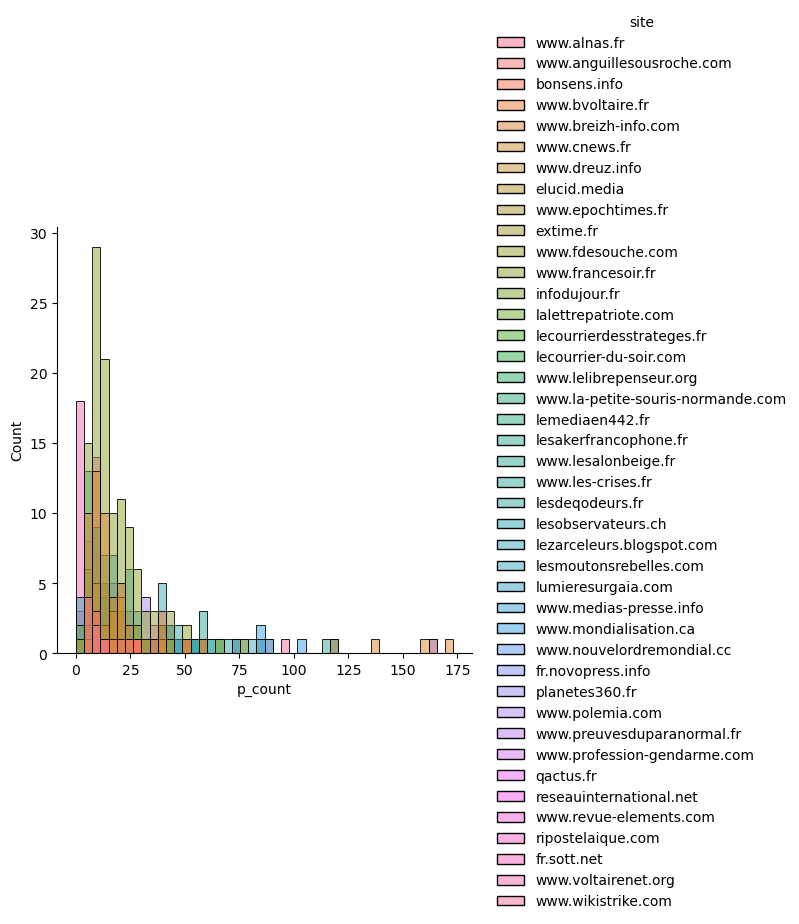

In [459]:
sns.displot(df_parsed,x='p_count',hue='site')

In [460]:
for url in df_parsed[df_parsed['c_count']==0]['url']:
    print(url)

https://planetes360.fr/scoop-lancien-vice-president-de-pfizer-declare-que-les-failles-des-vaccins-covid-sont-intentionnelles/
https://planetes360.fr/exclu-360-le-professeur-perr0nne-balance-tout-c0vid-masque-vaxxin-bill-gates-la-verite-va-eclater/


# Sauvegarde des résultats
---

In [461]:
filename = 'data/tmp/230505-Recueil.csv'

In [464]:
df_parsed = df_parsed[df_parsed['c_count']>0]

In [465]:
df_parsed.shape

(614, 12)

In [466]:
df_parsed.to_csv(filename)

# Conclusions
---

- Parser sur tous les sites du recueil !

# Bricolages
---

In [156]:
from bs4 import BeautifulSoup

In [414]:
df_debug = df_parsed[df_parsed['c_count']==0]

In [415]:
i=0
for url in df_debug['url']:
    print(i,url)
    i+=1

0 https://www.lelibrepenseur.org/une-enquete-ouverte-apres-la-decouverte-dossements-humains-dans-un-temple-maconnique-a-trebons/
1 https://lesmoutonsrebelles.com/la-banque-rothschild-veut-savoir-ce-que-vous-faites-de-votre-argent-en-temps-reel/
2 https://lesmoutonsrebelles.com/des-armes-gouvernementales-silencieuses-pour-mener-une-guerre-secrete-contre-vous/
3 https://lesmoutonsrebelles.com/coupures-delectricite-comment-nos-elites-dirigeantes-font-entrer-la-france-dans-le-tiers-monde/
4 https://lesmoutonsrebelles.com/prenant-acte-dun-vote-defavorable-elon-musk-annonce-son-depart-prochain-de-la-tete-de-twitter/
5 https://planetes360.fr/scoop-lancien-vice-president-de-pfizer-declare-que-les-failles-des-vaccins-covid-sont-intentionnelles/
6 https://planetes360.fr/exclu-360-le-professeur-perr0nne-balance-tout-c0vid-masque-vaxxin-bill-gates-la-verite-va-eclater/


In [431]:
html = imp.get_webpage(df_debug['url'].iloc[4],use_cache=False)

In [426]:
soup = BeautifulSoup(html)

In [427]:
soup

<!DOCTYPE html>
<!--[if IE 8]><html
class="no-js g1-off-outside lt-ie10 lt-ie9" id=ie8 lang=fr-FR><![endif]--><!--[if IE 9]><html
class="no-js g1-off-outside lt-ie10" id=ie9 lang=fr-FR><![endif]--><!--[if !IE]><!--><html class="no-js g1-off-outside" lang="fr-FR"><!--<![endif]--><head><meta charset="utf-8"/><link href="https://gmpg.org/xfn/11" rel="profile"/><link href="https://lesmoutonsrebelles.com/xmlrpc.php" rel="pingback"/><meta content="max-image-preview:large" name="robots"/><meta content="initial-scale=1.0, minimum-scale=1.0, height=device-height, width=device-width" name="viewport"/><title>La banque Rothschild veut savoir ce que vous faites de votre argent en temps réel</title><meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/><link href="https://lesmoutonsrebelles.com/la-banque-rothschild-veut-savoir-ce-que-vous-faites-de-votre-argent-en-temps-reel/" rel="canonical"/><meta content="fr_FR" property="og:locale"/><meta cont

In [428]:
s = soup.select('.entry-content p')
for p in s:
    print(p.text,'---')

Mozinor nous montre Emmanuel Macron jouant à fouiller dans les comptes et la vie privée des Français. Le Média en 4-4-2 vous explique pourquoi cette vidéo est d’actualité. ---
Le fichier des comptes bancaires (Ficoba) liste 80 millions de noms associés à tous les comptes et même, depuis 2020, les noms associés aux coffre-forts. Ce fichier, accessible à l’administration fiscale, aux douanes, à Tracfin, à la sécurité sociale, ou encore à la justice, vise à lutter contre les activités illégales. Il a été consulté à 40 millions de reprises en 2020 ! Bruno Le Maire a demandé le 15 septembre 2021, dans le cadre de la « modernisation » à avoir accès à l’ensemble des opérations sur les comptes, en temps réel. Une demande faite sans débat parlementaire ni consultation de la CNIL. Nadi Bou Hanna, alors à la tête de la direction interministérielle du numérique, émet un avis défavorable en mentionnant des finalités trop floues. Quelques semaines après, il annonce quitter son poste… Dans la pure tr

In [398]:
soup.find("meta", property="article:published_time").attrs.get('content')

'2022-10-31T11:30:03+00:00'

In [399]:
def get_date(html):
    soup = BeautifulSoup(html)
    s = soup.find("meta", property="article:published_time")
    if s:
        return s.attrs.get('content')

In [400]:
get_date(html)

'2022-10-31T11:30:03+00:00'

In [111]:
df_pages['dates'] = df_pages['html'].progress_apply(get_date)

  0%|          | 0/616 [00:00<?, ?it/s]

In [113]:
df_pages['dates'].notna().sum()

319

In [71]:
patat.imp.selectors.selectors[site].get('date',[])

['.entry-date']